In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import scipy.stats as stats 
import random 
import scipy 
import seaborn as sns 
import requests 
import json
import os 

In [2]:
csv=('data\Crime_Incidents.csv')
crime=pd.read_csv(csv)
crime.head()

C:\Users\Mamer Jammer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10,11,20,21,22,23,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,incident_id,case_number,incident_datetime,incident_type_primary,incident_description,clearance_type,address_1,address_2,city,state,...,location,hour_of_day,day_of_week,parent_incident_type,Census Tract 1,Census Block 1,Census Block Group 1,Neighborhood 1,Police District 1,Council District 1
0,951642799.0,20-0050070,01/05/2020 01:30:00 AM,LARCENY/THEFT,Buffalo Police are investigating this report o...,NaN,200 Block ONEIDA AV,NaN,Buffalo,NY,...,POINT (-78.843 42.876),2,SUNDAY,Theft,163,1005,1,Seneca Babcock,District A,FILLMORE
1,951660739.0,20-0050096,01/05/2020 02:07:00 AM,MURDER,Buffalo Police are investigating this report o...,NaN,PADEREWSKI DR & SHUMWAY ST,NaN,Buffalo,NY,...,POINT (-78.845 42.89),2,SUNDAY,Homicide,15,2021,2,Broadway Fillmore,District C,FILLMORE
2,951639680.0,20-0050120,01/04/2020 11:00:48 PM,ASSAULT,Buffalo Police are investigating this report o...,NaN,400 Block GRIDER ST,NaN,Buffalo,NY,...,POINT (-78.829 42.918),2,SUNDAY,Assault,34,5019,5,Delavan Grider,District E,MASTEN
3,952238541.0,20-0050158,01/05/2020 03:57:41 AM,ROBBERY,Buffalo Police are investigating this report o...,NaN,400 Block PEARL ST,NaN,Buffalo,NY,...,POINT (-78.873 42.891),20,SATURDAY,Robbery,165,1020,1,Central,District B,ELLICOTT
4,NaN,20-0050162,01/05/2020 04:00:00 AM,ASSAULT,Buffalo Police are investigating this report o...,NaN,0 Block POPLAR AV,NaN,Buffalo,NY,...,POINT (-78.805 42.907),4,SUNDAY,Assault,30,2003,2,Schiller Park,District C,LOVEJOY


In [4]:
crime.columns

Index(['incident_id', 'case_number', 'incident_datetime',
       'incident_type_primary', 'incident_description', 'clearance_type',
       'address_1', 'address_2', 'city', 'state', 'zip', 'country', 'latitude',
       'longitude', 'created_at', 'updated_at', 'location', 'hour_of_day',
       'day_of_week', 'parent_incident_type', 'Census Tract 1',
       'Census Block 1', 'Census Block Group 1', 'Neighborhood 1',
       'Police District 1', 'Council District 1'],
      dtype='object')

In [5]:
crime=crime.drop(['incident_id','case_number','parent_incident_type', 'Census Tract 1',
       'Census Block 1', 'Census Block Group 1', 'Neighborhood 1',
       'Police District 1', 'Council District 1', 'created_at', 'updated_at', 'clearance_type',
       'address_1', 'address_2', 'city', 'state', 'zip', 'country', 'incident_description', 'location','latitude',
       'longitude'],axis=1)

In [6]:
crime.head()

,incident_datetime,incident_type_primary,hour_of_day,day_of_week
0,01/05/2020 01:30:00 AM,LARCENY/THEFT,2,SUNDAY
1,01/05/2020 02:07:00 AM,MURDER,2,SUNDAY
2,01/04/2020 11:00:48 PM,ASSAULT,2,SUNDAY
3,01/05/2020 03:57:41 AM,ROBBERY,20,SATURDAY
4,01/05/2020 04:00:00 AM,ASSAULT,4,SUNDAY


In [7]:
columns={'incident_datetime':'date','incident_type_primary':'type','hour_of_day':'hour','day_of_week':'day'}
crime=crime.rename(columns=(columns))

In [8]:
crime.head()

,date,type,hour,day
0,01/05/2020 01:30:00 AM,LARCENY/THEFT,2,SUNDAY
1,01/05/2020 02:07:00 AM,MURDER,2,SUNDAY
2,01/04/2020 11:00:48 PM,ASSAULT,2,SUNDAY
3,01/05/2020 03:57:41 AM,ROBBERY,20,SATURDAY
4,01/05/2020 04:00:00 AM,ASSAULT,4,SUNDAY


In [9]:
crime.type.unique()

array(['LARCENY/THEFT', 'MURDER', 'ASSAULT', 'ROBBERY', 'BURGLARY',
       'THEFT OF SERVICES', 'UUV', 'SEXUAL ABUSE', 'RAPE', 'MANSLAUGHTER',
       'CRIM NEGLIGENT HOMICIDE', 'AGGR ASSAULT',
       'AGG ASSAULT ON P/OFFICER', 'Assault', 'Sexual Assault',
       'Other Sexual Offense', 'Breaking & Entering', 'Theft', 'Robbery',
       'Theft of Vehicle', 'Homicide'], dtype=object)

In [10]:
crime['type']=[str.lower(i)for i in crime.type]

In [11]:
crime.type.unique()

array(['larceny/theft', 'murder', 'assault', 'robbery', 'burglary',
       'theft of services', 'uuv', 'sexual abuse', 'rape', 'manslaughter',
       'crim negligent homicide', 'aggr assault',
       'agg assault on p/officer', 'sexual assault',
       'other sexual offense', 'breaking & entering', 'theft',
       'theft of vehicle', 'homicide'], dtype=object)

In [12]:
crime['type']=(crime['type']).str.replace("larceny/theft",'larceny')

In [13]:
crime.type.unique()

array(['larceny', 'murder', 'assault', 'robbery', 'burglary',
       'theft of services', 'uuv', 'sexual abuse', 'rape', 'manslaughter',
       'crim negligent homicide', 'aggr assault',
       'agg assault on p/officer', 'sexual assault',
       'other sexual offense', 'breaking & entering', 'theft',
       'theft of vehicle', 'homicide'], dtype=object)

In [14]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270268 entries, 0 to 270267
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    270263 non-null  object
 1   type    270268 non-null  object
 2   hour    270268 non-null  int64 
 3   day     270263 non-null  object
dtypes: int64(1), object(3)
memory usage: 8.2+ MB


In [ ]:
crime['date']=pd.to_datetime(crime.date)

In [ ]:
crime.info()

In [30]:
crime=crime.set_index('date')

In [31]:
crime=crime.loc['01-01-1991':'01-04-2021']

In [32]:
crime.loc['2000']

,type,hour,day
date,,,
2000-09-02 00:00:00,uuv,12,WEDNESDAY
2000-05-14 01:15:00,assault,1,Sunday
2000-02-09 00:00:00,larceny,0,Wednesday
2000-07-31 11:08:00,assault,11,Monday
2000-09-29 14:59:00,larceny,14,Friday
2000-06-23 00:00:00,larceny,0,Friday
2000-11-09 11:00:00,uuv,11,Thursday
2000-03-12 00:01:00,burglary,0,Sunday
2000-09-14 00:00:00,burglary,0,Thursday


# variable significance test 

<AxesSubplot:ylabel='Frequency'>

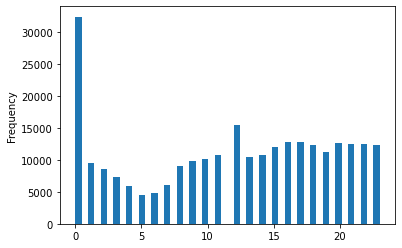

In [33]:
crime.hour.plot(kind='hist',bins=48)

In [34]:
crime.day.value_counts()

Friday       38383
Saturday     38081
Wednesday    35842
Monday       35834
Sunday       35634
Thursday     35484
Tuesday      35401
MONDAY        1900
TUESDAY       1800
FRIDAY        1737
THURSDAY      1735
WEDNESDAY     1705
SUNDAY        1641
SATURDAY      1619
Name: day, dtype: int64

it appears that a 
not that significant but good information be know ! 

In [35]:
crime['count']=1

In [36]:
crime.head()

,type,hour,day,count
date,,,,
2020-01-05 01:30:00,larceny,2,SUNDAY,1
2020-01-05 02:07:00,murder,2,SUNDAY,1
2020-01-04 23:00:48,assault,2,SUNDAY,1
2020-01-05 03:57:41,robbery,20,SATURDAY,1
2020-01-05 04:00:00,assault,4,SUNDAY,1


In [37]:
crime['day']=[str.lower(i)for i in crime.day]

In [38]:
crime.day.unique()

array(['sunday', 'saturday', 'wednesday', 'friday', 'monday', 'thursday',
       'tuesday'], dtype=object)

In [39]:
crime.sample(n=15)

,type,hour,day,count
date,,,,
2009-10-16 21:00:00,larceny,21,friday,1
2017-04-08 08:19:05,burglary,8,saturday,1
2010-02-03 00:00:00,uuv,0,wednesday,1
2014-02-28 09:35:00,larceny,9,friday,1
2009-04-11 17:00:00,burglary,17,saturday,1
2006-12-16 20:00:00,burglary,20,saturday,1
2017-06-23 07:50:00,larceny,7,friday,1
2018-06-09 13:15:00,larceny,13,saturday,1
2015-10-07 08:30:00,larceny,8,wednesday,1


In [40]:
crime.type.unique()

array(['larceny', 'murder', 'assault', 'robbery', 'burglary',
       'theft of services', 'uuv', 'sexual abuse', 'rape', 'manslaughter',
       'crim negligent homicide', 'aggr assault',
       'agg assault on p/officer', 'sexual assault',
       'other sexual offense', 'breaking & entering', 'theft',
       'theft of vehicle', 'homicide'], dtype=object)

In [41]:
df=crime

In [42]:
df['type'] = df['type'].str.replace("larceny","prperty")
df['type'] = df['type'].str.replace('robbery',"prperty")
df['type'] = df['type'].str.replace('burglary',"prperty")
df['type'] = df['type'].str.replace('breaking & entering',"prperty")
df['type'] = df['type'].str.replace('theft',"prperty")
df['type'] = df['type'].str.replace('theft of vehicle',"prperty")
df['type'] = df['type'].str.replace('prperty of vehicle',"prperty")
df['type'] = df['type'].str.replace('prperty of services',"prperty")

In [43]:
df.type.unique()

array(['prperty', 'murder', 'assault', 'uuv', 'sexual abuse', 'rape',
       'manslaughter', 'crim negligent homicide', 'aggr assault',
       'agg assault on p/officer', 'sexual assault',
       'other sexual offense', 'homicide'], dtype=object)

In [44]:
df['type'] = df['type'].str.replace('murder',"violent")
df['type'] = df['type'].str.replace('assault',"violent")
df['type'] = df['type'].str.replace('uuv',"violent")
df['type'] = df['type'].str.replace('aggr assault',"violent")
df['type'] = df['type'].str.replace('agg assault on p/officer',"violent")
df['type'] = df['type'].str.replace('homicide',"violent")
df['type'] = df['type'].str.replace('manslaughter',"violent")
df['type'] = df['type'].str.replace('aggr violent',"violent")
df['type'] = df['type'].str.replace('crim negligent violent',"violent")
df['type'] = df['type'].str.replace('agg violent on p/officer',"violent")

In [45]:
df.type.unique()

array(['prperty', 'violent', 'sexual abuse', 'rape', 'sexual violent',
       'other sexual offense'], dtype=object)

In [46]:
df['type'] = df['type'].str.replace('sexual abuse',"sexual")
df['type'] = df['type'].str.replace('rape',"sexual")
df['type'] = df['type'].str.replace('sexual violent',"sexual")
df['type'] = df['type'].str.replace('other sexual offense',"sexual")

In [47]:
df.head()

,type,hour,day,count
date,,,,
2020-01-05 01:30:00,prperty,2,sunday,1
2020-01-05 02:07:00,violent,2,sunday,1
2020-01-04 23:00:48,violent,2,sunday,1
2020-01-05 03:57:41,prperty,20,saturday,1
2020-01-05 04:00:00,violent,4,sunday,1


In [74]:
melted=df.melt(id_vars='type',value_vars='count',ignore_index=False)


In [75]:
melted['value']=melted.value.astype(int)

In [76]:
melted=melted.drop('variable',axis=1)

In [77]:
hello=melted.groupby(by='type').resample('m').count()

In [65]:

hello

type  variable  value
type    date                             
prperty 1991-05-31     1         1      1
        1991-06-30     0         0      0
        1991-07-31     0         0      0
        1991-08-31     0         0      0
        1991-09-30     0         0      0
...                  ...       ...    ...
violent 2020-09-30   382       382    382
        2020-10-31   417       417    417
        2020-11-30   400       400    400
        2020-12-31   356       356    356
        2021-01-31    66        66     66

[1048 rows x 3 columns]

ValueError: cannot insert type, already exists

# Note

after deriving a sample from the data provided by the city of buffalo it appears that there are some discrepencies in 
reporting, the information needs to be checked in depth 

In [79]:
propert=hello[hello['type']=='prperty']
propert=propert.drop('type',axis=1)
propert=propert.rename({'value':'property'},axis=1)

In [81]:
propert

,,property
type,date,


,,type,variable,value
type,date,,,


In [366]:
violent=hello[hello['type']=='violent']
violent=violent.drop('variable',axis=1)
violent=violent.drop('type',axis=1)
violent=violent.rename({'value':'violent'},axis=1)

In [367]:
violent.sample(n=15)

,date,violent
860,2005-06-30,2
957,2013-07-31,482
942,2012-04-30,384
888,2007-10-31,571
723,1994-01-31,0
865,2005-11-30,5
752,1996-06-30,0
952,2013-02-28,359
819,2002-01-31,2
945,2012-07-31,571


In [352]:
sexual=hello[hello['type']=='sexual']

In [360]:
sexual=sexual.drop('variable',axis=1)

In [354]:
sexual=sexual.rename({'value':'sexual'},axis=1)

In [355]:
sexual

,date,variable,sexual
357,1992-01-31,1,1
358,1992-02-29,0,0
359,1992-03-31,0,0
360,1992-04-30,0,0
361,1992-05-31,0,0
...,...,...,...
701,2020-09-30,5,5
702,2020-10-31,3,3
703,2020-11-30,11,11
704,2020-12-31,19,19


In [356]:
merged=pd.merge(sexual,violent, how='inner',on='date')

In [357]:
merged=pd.merge(merged,propert, how='inner',on='date')

In [358]:
merged=merged.set_index('date')

In [584]:
merged=merged.drop(['date','new_date'],axis=1)

In [585]:
merged

,variable_x,sexual,variable_y,violent,variable,property
date,,,,,,
1992-08-31,0,0,1,1,0,0
1992-09-30,0,0,0,0,0,0
1992-10-31,0,0,0,0,0,0
1992-11-30,0,0,0,0,0,0
1992-12-31,0,0,0,0,0,0
...,...,...,...,...,...,...
2020-09-30,5,5,382,382,710,710
2020-10-31,3,3,417,417,739,739
2020-11-30,11,11,400,400,691,691


In [476]:
merged1=merged.loc['01-01-2006':]
merged1=merged1[['sexual','violent','property']]
merged1

,sexual,violent,property
date,,,
2006-01-31,45,466,972
2006-02-28,18,301,532
2006-03-31,6,114,215
2006-04-30,18,347,688
2006-05-31,43,712,1315
...,...,...,...
2020-09-30,5,382,710
2020-10-31,3,417,739
2020-11-30,11,400,691


# note 

looks like the data is missing reports of crimes commited between 1990 and late to 2006.
therefore , we need to add some more data to fill the gap that was not reported. 
the way to do that is by relying on the annual crime reports from NY state. 


In [464]:

crime_a=pd.read_csv(r'C:\Users\Mamer Jammer\Desktop\springboard\datasets\mamer alomari code training\capstone two , buffalo crime predictor\data\buffalo_crime_ny_state.csv')

In [465]:
crime_a

,Date,Index Total,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft
0,2019-12-01,10828,2533,47,121,802,1563,8295,1609,6008,678
1,2018-12-01,12531,2691,57,167,906,1561,9840,2269,6704,867
2,2017-12-01,12435,2610,40,141,857,1572,9825,2354,6638,833
3,2016-12-01,13455,2857,44,153,1049,1611,10598,2630,7133,835
4,2015-12-01,14061,2886,41,172,1033,1640,11175,2777,7421,977
5,2014-12-01,15562,3114,60,114,1277,1663,12448,3118,8362,968
6,2013-12-01,15731,3251,47,150,1320,1734,12480,3458,8066,956
7,2012-12-01,16834,3380,48,138,1388,1806,13454,3976,8371,1107
8,2011-12-01,17555,3250,36,121,1459,1634,14305,4473,8711,1121
9,2010-12-01,18352,3599,55,157,1466,1921,14753,4296,9027,1430


In [466]:
crime_a['Date']=pd.to_datetime(crime_a['Date'])


In [467]:
crime_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 30 non-null     datetime64[ns]
 1   Index Total          30 non-null     int64         
 2   Violent Total        30 non-null     int64         
 3   Murder               30 non-null     int64         
 4   Rape                 30 non-null     int64         
 5   Robbery              30 non-null     int64         
 6   Aggravated Assault   30 non-null     int64         
 7   Property Total       30 non-null     int64         
 8   Burglary             30 non-null     int64         
 9   Larceny              30 non-null     int64         
 10  Motor Vehicle Theft  30 non-null     int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 2.7 KB


In [468]:
crime_a=crime_a.set_index('Date')

In [469]:
crime_a.head()

,Index Total,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft
Date,,,,,,,,,,
2019-12-01,10828,2533,47,121,802,1563,8295,1609,6008,678
2018-12-01,12531,2691,57,167,906,1561,9840,2269,6704,867
2017-12-01,12435,2610,40,141,857,1572,9825,2354,6638,833
2016-12-01,13455,2857,44,153,1049,1611,10598,2630,7133,835
2015-12-01,14061,2886,41,172,1033,1640,11175,2777,7421,977


In [470]:
missing=crime_a.loc['2005':]
missing

,Index Total,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft
Date,,,,,,,,,,
2005-12-01,20668,3938,56,184,1667,2031,16730,4240,10089,2401
2004-12-01,20050,3806,51,212,1485,2058,16244,3914,9928,2402
2003-12-01,20429,3919,60,206,1654,1999,16510,4131,9851,2528
2002-12-01,19017,3757,43,185,1627,1902,15260,3857,9115,2288
2001-12-01,19894,3709,64,229,1600,1816,16185,3965,9669,2551
2000-12-01,20248,3657,39,176,1555,1887,16591,4194,9831,2566
1999-12-01,20678,3242,32,175,1473,1562,17436,4428,10018,2990
1998-12-01,22321,3485,39,197,1736,1513,18836,5155,10713,2968
1997-12-01,25291,4013,46,230,2195,1542,21278,5984,11424,3870


In [471]:
missing=missing.reset_index()
missing=missing[['Date','Violent Total','Rape','Property Total']]

In [477]:
missing_cols={'Date':'date','Violent Total':'violent','Property Total':'property','Rape':'sexual'}
missing=missing.rename(columns=missing_cols)
missing

,date,violent,sexual,property
0,2005-12-01,3938,184,16730
1,2004-12-01,3806,212,16244
2,2003-12-01,3919,206,16510
3,2002-12-01,3757,185,15260
4,2001-12-01,3709,229,16185
5,2000-12-01,3657,176,16591
6,1999-12-01,3242,175,17436
7,1998-12-01,3485,197,18836
8,1997-12-01,4013,230,21278
9,1996-12-01,4524,269,22112


In [480]:
merged1=merged1.reset_index()

In [482]:
crime_final=pd.concat([merged1,missing],ignore_index=True)

In [485]:
crime_final=crime_final.set_index('date')

In [491]:
crime_final.property['2008':]

date
2008-01-31    162
2008-02-29     12
2008-03-31     24
2008-04-30     25
2008-05-31     64
             ... 
2020-09-30    710
2020-10-31    739
2020-11-30    691
2020-12-31    647
2021-01-31     76
Name: property, Length: 157, dtype: int64

In [492]:
crime_final.to_csv('crime_final.csv')

# note 

now it's time to add the unemployment data, this will happen in two stages . we will first divide the data into two sets one between 1990 and 2006 which will be resampled to annual mean reporting. The other will be between 2007 and 2021 which will be displayed in monthly reporting. 

In [513]:
unemployment=r'C:\Users\Mamer Jammer\Desktop\capstone\Local_Area_Unemployment_Statistics.csv'
unemployment2019=pd.read_csv(unemployment,header=0)

In [514]:
unemployment2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74423 entries, 0 to 74422
Data columns (total 7 columns):
 #   Column                                                                                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                                                                                   --------------  -----  
 0   Area                                                                                                                                                                                     74423 non-null  object 
 1   Year                                                                                                                                                                                     74423 non-null  int64  
 2   Month                          

In [515]:
df2=unemployment2019
df2.head()

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate
0,Albany City,2021,1,"46,800","43,100","3,700",7.9
1,Albany City,2020,12,"47,200","43,500","3,700",7.8
2,Albany City,2020,11,"47,400","43,800","3,600",7.7
3,Albany City,2020,10,"47,200","43,500","3,800",8.0
4,Albany City,2020,9,"47,200","43,200","3,900",8.4


In [516]:
df3=df2[['Year','Month']]
df3['day']=1
df3=pd.to_datetime(df3,yearfirst=True,errors='coerce',format='%m-%Y')


<ipython-input-516-8e887ba7c0eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['day']=1


In [517]:
df3.head()

0   2021-01-01
1   2020-12-01
2   2020-11-01
3   2020-10-01
4   2020-09-01
dtype: datetime64[ns]

In [518]:
df2['Date']=df3
df2.head()

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate,Date
0,Albany City,2021,1,"46,800","43,100","3,700",7.9,2021-01-01
1,Albany City,2020,12,"47,200","43,500","3,700",7.8,2020-12-01
2,Albany City,2020,11,"47,400","43,800","3,600",7.7,2020-11-01
3,Albany City,2020,10,"47,200","43,500","3,800",8.0,2020-10-01
4,Albany City,2020,9,"47,200","43,200","3,900",8.4,2020-09-01


In [519]:
df2=df2.drop(["Year","Month"],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74423 entries, 0 to 74422
Data columns (total 6 columns):
 #   Column                                                                                                                                                                                   Non-Null Count  Dtype         
---  ------                                                                                                                                                                                   --------------  -----         
 0   Area                                                                                                                                                                                     74423 non-null  object        
 1   Labor Force                                                                                                                                                                              74423 non-null  object        
 2   Emp

In [520]:
df2['Labor Force']=(df2['Labor Force']).str.replace(",",'').astype(int)
df2['Employed']=(df2['Employed']).str.replace(",",'').astype(int)
df2['Unemployed']=(df2['Unemployed']).str.replace(",",'').astype(int)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74423 entries, 0 to 74422
Data columns (total 6 columns):
 #   Column                                                                                                                                                                                   Non-Null Count  Dtype         
---  ------                                                                                                                                                                                   --------------  -----         
 0   Area                                                                                                                                                                                     74423 non-null  object        
 1   Labor Force                                                                                                                                                                              74423 non-null  int32         
 2   Emp

In [521]:
Buff=df2[df2['Area']=='Buffalo City']
Buff.head()

,Area,Labor Force,Employed,Unemployed,Unemployment Rate,Date
6510,Buffalo City,109400,97400,12000,11.0,2021-01-01
6511,Buffalo City,110600,98300,12300,11.1,2020-12-01
6512,Buffalo City,110000,98800,11100,10.1,2020-11-01
6513,Buffalo City,110200,98800,11400,10.3,2020-10-01
6514,Buffalo City,110100,97900,12300,11.1,2020-09-01


In [604]:
Buff=Buff.reset_index()
Buff=Buff.rename(columns={'Date':'date'})
Buff.head()

,date,Area,Labor Force,Employed,Unemployed,Unemployment Rate
0,2021-01-01,Buffalo City,109400,97400,12000,11.0
1,2020-12-01,Buffalo City,110600,98300,12300,11.1
2,2020-11-01,Buffalo City,110000,98800,11100,10.1
3,2020-10-01,Buffalo City,110200,98800,11400,10.3
4,2020-09-01,Buffalo City,110100,97900,12300,11.1


In [601]:
df=crime_final
df=df.reset_index()
df.head()

,date,sexual,violent,property
0,2006-01-31,45,466,972
1,2006-02-28,18,301,532
2,2006-03-31,6,114,215
3,2006-04-30,18,347,688
4,2006-05-31,43,712,1315


In [602]:
df['new_date']=pd.to_datetime(pd.DataFrame({'day': 1,'month': df['date'].dt.month,'year': df['date'].dt.year}))
df.head()

,date,sexual,violent,property,new_date
0,2006-01-31,45,466,972,2006-01-01
1,2006-02-28,18,301,532,2006-02-01
2,2006-03-31,6,114,215,2006-03-01
3,2006-04-30,18,347,688,2006-04-01
4,2006-05-31,43,712,1315,2006-05-01


In [603]:
df=df.drop('date',axis=1)
df=df.rename(columns={'new_date':'date'})
df.head()

,sexual,violent,property,date
0,45,466,972,2006-01-01
1,18,301,532,2006-02-01
2,6,114,215,2006-03-01
3,18,347,688,2006-04-01
4,43,712,1315,2006-05-01


In [605]:
final=pd.merge(df,Buff,how='left',on='date')
final.sample(n=15)

,sexual,violent,property,date,Area,Labor Force,Employed,Unemployed,Unemployment Rate
108,30,373,919,2015-01-01,Buffalo City,110300,101700,8600,7.8
97,17,284,767,2014-02-01,Buffalo City,111400,101400,10000,8.9
16,37,600,1219,2007-05-01,Buffalo City,119800,113100,6700,5.6
196,355,5276,23906,1990-12-01,Buffalo City,147500,133700,13900,9.4
67,31,506,1559,2011-08-01,Buffalo City,117100,104400,12700,10.9
161,21,402,821,2019-06-01,Buffalo City,108800,103000,5800,5.3
57,28,505,1381,2010-10-01,Buffalo City,118200,105900,12400,10.4
122,28,361,787,2016-03-01,Buffalo City,109600,102600,6900,6.3
120,32,355,880,2016-01-01,Buffalo City,109600,102500,7100,6.5
104,19,361,1153,2014-09-01,Buffalo City,111100,102600,8500,7.7


In [606]:
final=final.drop('Area',axis=1)
final=final.set_index('date')


In [609]:
final.sample(n=15)

,sexual,violent,property,Labor Force,Employed,Unemployed,Unemployment Rate
date,,,,,,,
2015-06-01,35,483,1072,112800,104700,8100,7.2
2012-10-01,20,472,1253,117800,105600,12200,10.3
2003-12-01,206,3919,16510,124200,115500,8700,7.0
2018-10-01,28,373,910,108600,103600,5000,4.6
2020-04-01,7,216,472,107300,81500,25700,24.0
2013-05-01,27,520,1152,115900,104700,11300,9.7
2016-05-01,30,478,939,109600,103400,6200,5.7
2010-09-01,36,471,1478,118800,105900,12800,10.8
2012-05-01,23,517,1256,116300,103700,12600,10.8


In [610]:
final.to_csv('crime-labor-cleaned.csv')